### 使用PCA降噪

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 5, size=100)

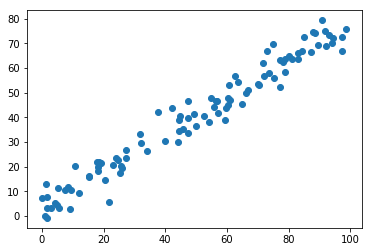

In [3]:
plt.scatter(X[:, 0], X[:, 1])

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(X)
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

D:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


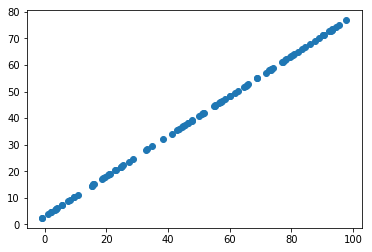

In [6]:
plt.scatter(X_restore[:, 0], X_restore[:, 1])

消除的抖动可能就是噪音，降维 丢失部分信息 同时也去噪声

### 手写识别

In [7]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

D:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [8]:
X.shape

(1797, 64)

In [9]:
noise_digits = X + np.random.normal(0, 4, size=X.shape)

In [10]:
example_digits = noise_digits[y==0,:][:10]
for num in range(1, 10):
    X_num = noise_digits[y==num,:][:10]
    example_digits = np.vstack([example_digits, X_num])

In [11]:
example_digits.shape

(100, 64)

In [12]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),
                 cmap='binary', interpolation='nearest',
                 clim=(0,16))

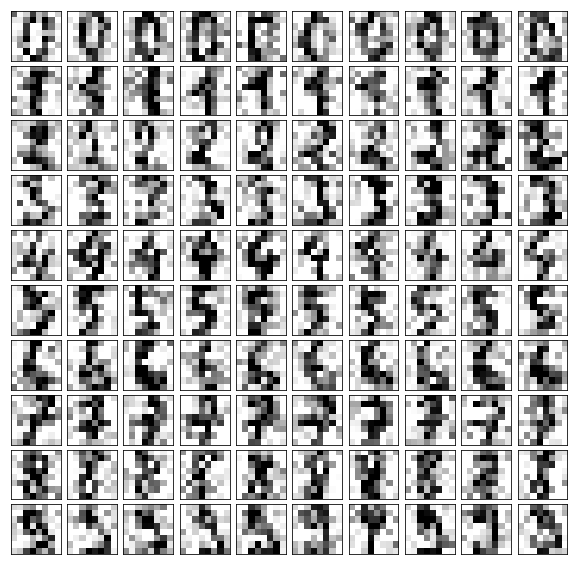

In [13]:
plot_digits(example_digits)

pca降噪

In [14]:
pca = PCA(0.5)
pca.fit(noise_digits)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [15]:
pca.n_components_

12

In [ ]:
components = pca.transform(example_digits)
pca